# LA

In [1]:
import pandas as pd
import numpy as np
# for plotting graphics
import matplotlib.pyplot as plt
import seaborn as sns
# for displaying all the rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
sns.set(style='white', context='notebook', palette='deep')


# for the configuration of the plot, such as label size, title size etc.
params = {'legend.fontsize': '20',
          'figure.figsize': (17, 7),
         'axes.labelsize': '18',
         'axes.titlesize':'24',
         'xtick.labelsize':'16',
         'ytick.labelsize':'16',
         #'axes.titlecolor': '#8a0909'
         }
plt.rcParams.update(params)
plt.rcParams['text.color'] = '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['axes.labelcolor'] = '#283747'

In [2]:
df= pd.read_csv('/dsa/groups/casestudy2022f/group_3/LAcleaning3.csv')
# df=pd.read_csv('LAcleaning2.csv')

In [3]:
df.head()

,Unnamed: 0,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,Cities,latitude,longitude,property_type,room_type,accommodates,n_bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_email,host_phone,host_work_email,wifi,kitchen,parking,bedding,bathessentials,ACHeating,washer,workspace
0,0,11,within a day,100,100,f,2.0,3.0,t,f,Venice,City of Los Angeles,33.99211,-118.47600,House,Entire home/apt,2,1.0,2.0,2.0,152.0,30,90,30.0,30.0,90.0,90.0,30.0,90.0,0,0,0,0,3,0,0,3847.0,1305.0,5.00,4.67,4.67,5.00,5.00,5.00,5.00,f,2,2,0,0,0.02,1,1,0,1,1,1,1,1,1,0,0
1,1,12,NaN,0,0,f,2.0,2.0,t,t,Other,City of Los Angeles,34.12206,-118.26783,House,Entire home/apt,2,1.0,1.0,1.0,75.0,30,365,30.0,30.0,365.0,365.0,30.0,365.0,0,2,3,224,138,0,0,4240.0,648.0,4.64,4.77,4.55,4.89,4.85,4.95,4.76,f,2,2,0,0,0.98,1,1,0,0,1,1,1,0,1,1,0
2,2,11,NaN,0,0,f,2.0,2.0,t,t,Venice,City of Los Angeles,33.97487,-118.46312,House,Entire home/apt,1,1.0,1.0,1.0,125.0,30,30,30.0,30.0,30.0,30.0,30.0,30.0,0,0,0,0,30,0,0,4035.0,1733.0,4.88,4.93,4.63,4.78,4.93,4.89,4.85,t,1,1,0,0,0.22,1,1,1,1,1,1,0,0,1,1,0
3,3,12,within an hour,100,90,f,1.0,2.0,t,t,Mar Vista,City of Los Angeles,34.00389,-118.44126,Hotel,Entire home/apt,2,1.0,NaN,1.0,189.0,3,365,2.0,3.0,365.0,365.0,3.0,365.0,13,43,73,348,378,41,2,4372.0,32.0,4.73,4.83,4.80,4.94,4.90,4.83,4.74,f,1,1,0,0,2.60,1,1,0,1,1,1,1,1,1,1,1
4,4,14,NaN,0,0,f,1.0,3.0,t,t,Culver City,Other Cities,33.98301,-118.38607,Apartment,Entire home/apt,6,2.0,2.0,3.0,115.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,0,0,0,139,2,0,0,4056.0,2321.0,4.00,5.00,5.00,3.00,4.00,5.00,4.00,f,1,1,0,0,0.01,1,1,0,1,1,1,0,0,1,1,0


# EDA

# Checking how many listings are available for all the 365 days?

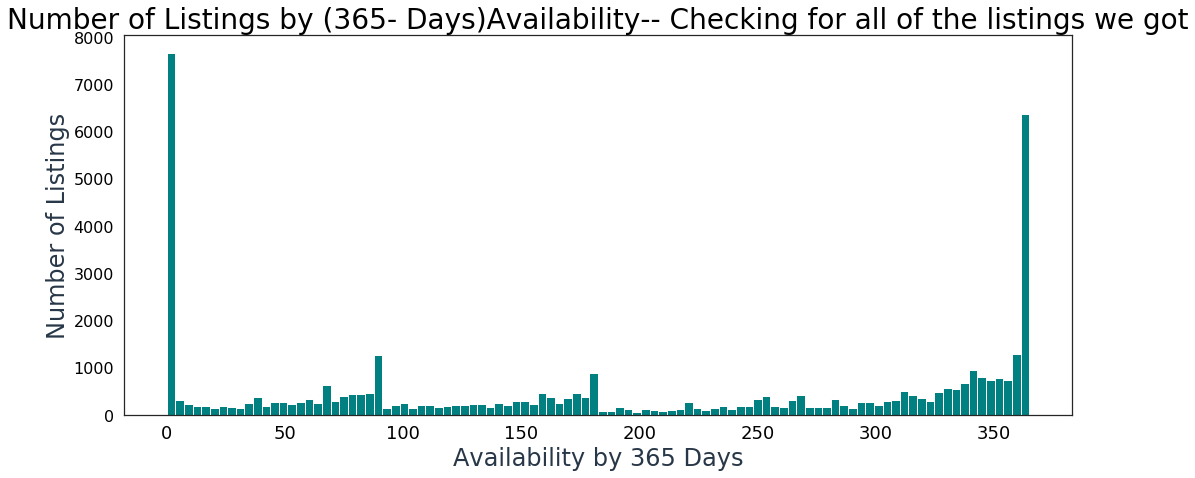

In [18]:
df['availability_365'].plot(kind='hist', bins = 100, color = 'teal')
plt.xlabel('Availability by 365 Days', fontsize = 24)
plt.ylabel("Number of Listings", fontsize = 24)
plt.xticks(fontsize = 24)
plt.xticks(fontsize = 18)

plt.title("Number of Listings by (365- Days)Availability-- Checking for all of the listings we got", fontsize = 28)
plt.show();

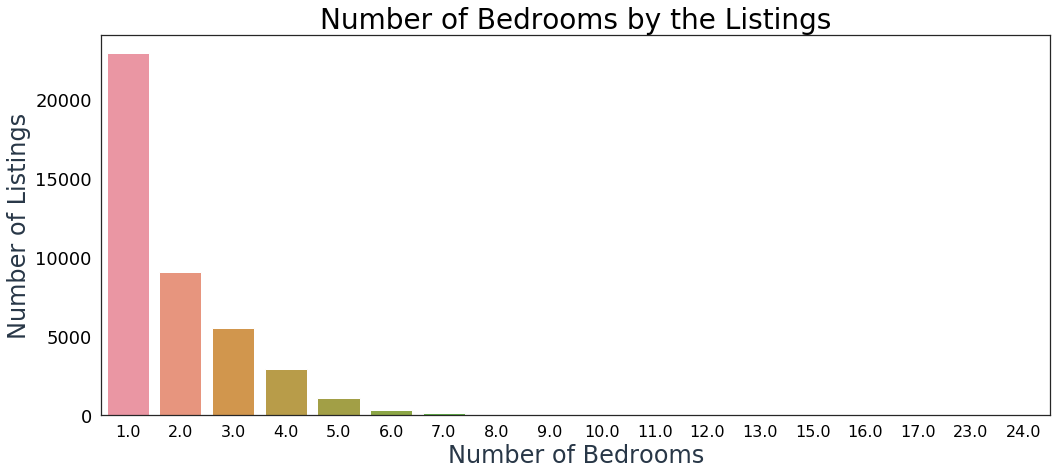

In [20]:
## Doing a countplot on bedroom column to find out which is the most preferred one
room_plot = sns.countplot(df['bedrooms'])
plt.xlabel('Number of Bedrooms', fontsize = 24)
plt.ylabel("Number of Listings", fontsize = 24)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 18)

plt.title("Number of Bedrooms by the Listings", fontsize = 28)

plt.show();

- Most of the listings have either 1 bedroom, 2 bedrooms ,3 bedrooms and then followed by 4 bedrooms and 5 bedrooms.
- A very few listings have 6 bedrooms or more than that

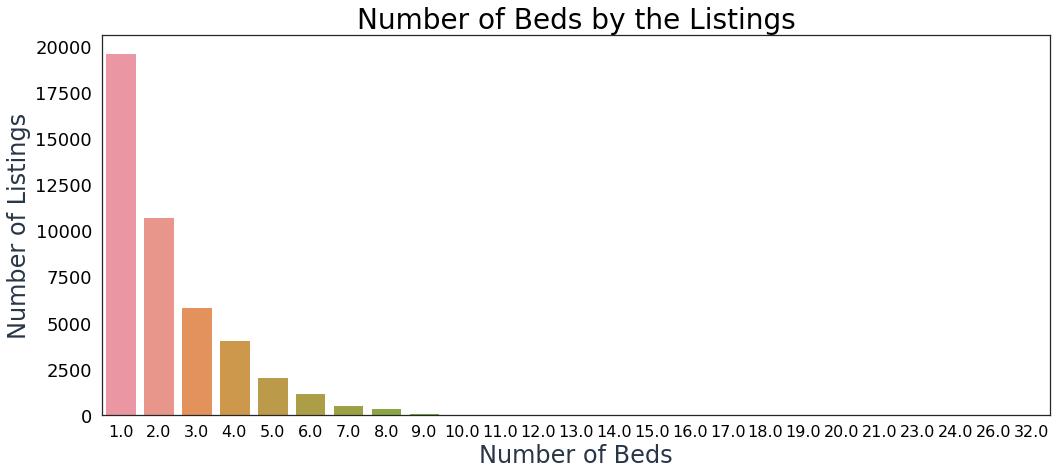

In [21]:
## Doing a countplot on room_type column to find out which is the most preferred type
room_plot = sns.countplot(df['beds'])
plt.xlabel('Number of Beds', fontsize = 24)
plt.ylabel("Number of Listings", fontsize = 24)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 18)

plt.title("Number of Beds by the Listings", fontsize = 28)

plt.show();

- Most of the listings are having 1 bed followed by 2 bed, 3 bed and 4 beds.
- A very few listings have 8 beds or more than that 

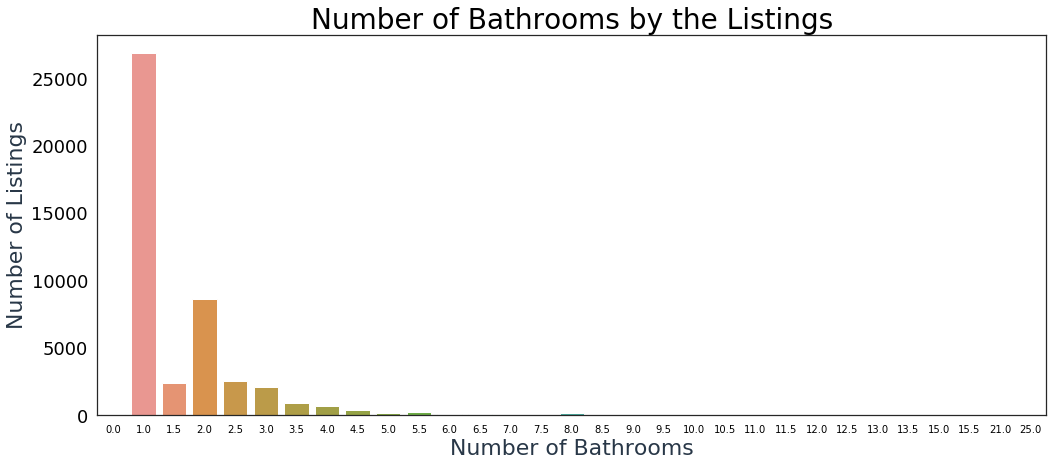

In [55]:
## Checking for the bathroom column
room_plot = sns.countplot(df['n_bathrooms'])
plt.xlabel('Number of Bathrooms', fontsize = 22)
plt.ylabel("Number of Listings", fontsize = 22)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 18)

plt.title("Number of Bathrooms by the Listings", fontsize = 28)

plt.show();

- Most of the listings are having either 1 bath or 2 bath.
- A very few listings are having 4.5 or more than that

### Finding out the top neighbourhoods in LA according to more number of Airbnb listings present in those neighbourhoods


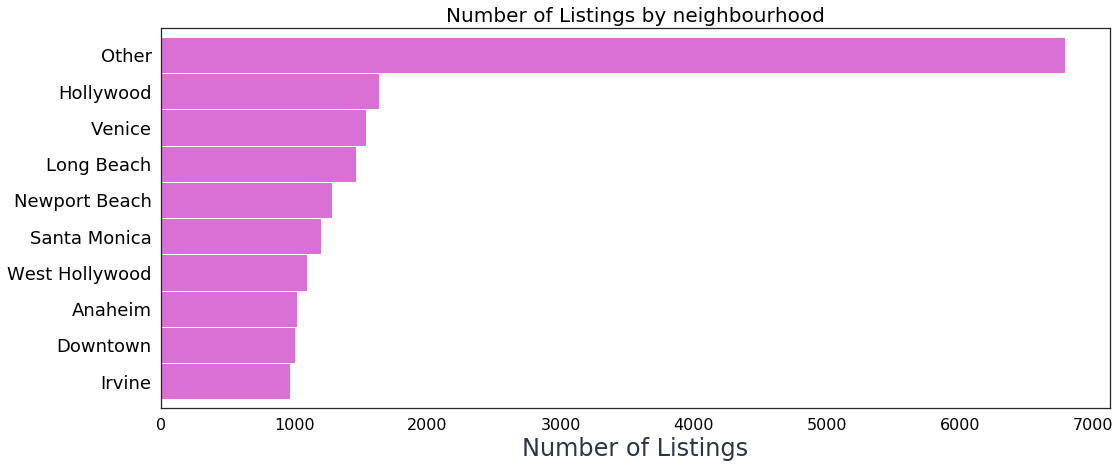

In [22]:
## Plotting a bar graph here 
feq=df['neighbourhood'].value_counts().nlargest(10).\
    sort_values(ascending=True)
feq.plot.barh(figsize=(17, 7), color='orchid', width=1)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 18)
plt.title("Number of Listings by neighbourhood", fontsize=20)
plt.xlabel('Number of Listings', fontsize=24)
plt.show();

#Most of the property listings are located in Other nearby locations, Hollywood, Venice, Longbeach Neighbourhoods
#We have classified as top neighbourhoods as more number of listings are present in these neighbourhoods

# Lets see how the Airbnb classify the room types

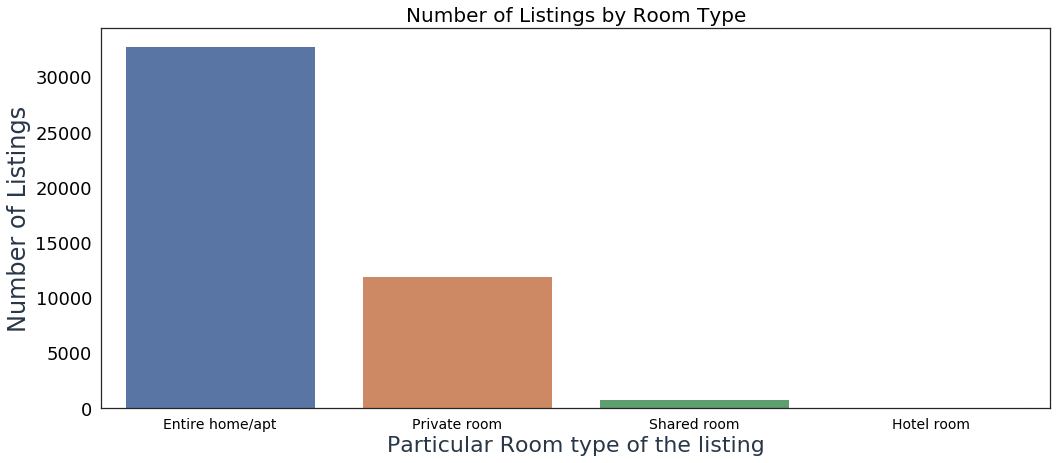

In [23]:
room_plot = sns.countplot(df['room_type'])
room_plot.set(xlabel='', ylabel='Number of Airbnb')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 18)
plt.title("Number of Listings by Room Type", fontsize=20)
plt.xlabel('Particular Room type of the listing', fontsize=22)
plt.ylabel('Number of Listings', fontsize=24)
plt.show();

Airbnb offers different options of room types depending on your budget. 
It has 4 different types of room types, which are:- Entire home/apartment, private room, shared room, Hotel room.
1.	Entire home: is where you can have the entire place just for yourself. This is the most expensive room type as the place is all yours and privacy is guaranteed.
2.	Private room: You will get a private room for yourself with nobody else but there could be  somebody else staying in another room in the same home/apartment as you.
3.	Shared room: You’ll have shared space with a bed in a room and their could be a another traveler/guest similar to you booked another bed in the same room
4.	Hotel Room: Whether you book a private or shared hotel rooms they provide a level of service and hospitality associated with traditional hotels.  But there are less room types with hotel rooms as most popular hotels like Hilton, Hyatt Hotels do not host on Airbnb as they have created a separate brand for their own.

#Most of the Airbnb listings are either Entire home/Apartment followed by Private Room and then Shared Room and a very few Hotel rooms.

# Which Airbnb room type is the cheapest to stay in LA?

In [57]:
# price groupby room type 
roomtype_price = round(df.groupby('room_type')['price'].mean())
roomtype_price

room_type
Entire home/apt    353.0
Hotel room         516.0
Private room       132.0
Shared room         60.0
Name: price, dtype: float64

- Shared room is cheapest to stay in LA.

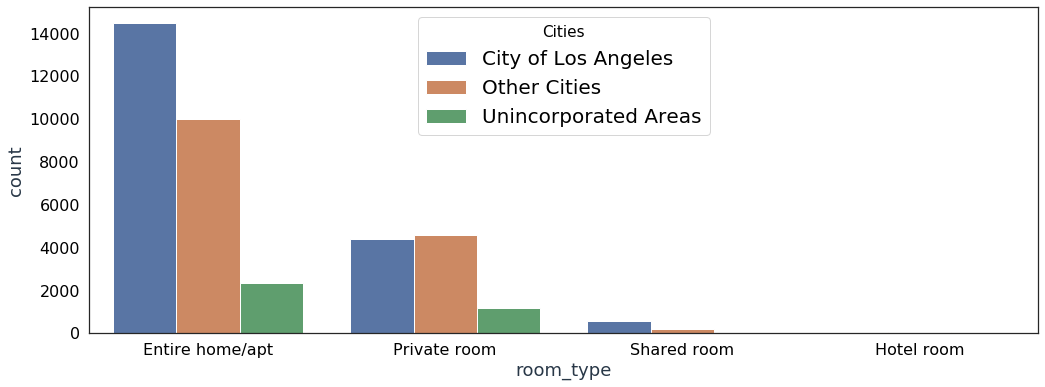

In [59]:
# Room type distribution in the neighborhood groups

plt.figure(figsize=(17,6))
ax = sns.countplot(x="room_type", data=df,hue="Cities")
plt.show();

- Mostly we having Entire home/apartment in City of LA and Other Cities, then followed by Private Room

# Whether a particular room type is priced differently in different neighborhoods of LA?

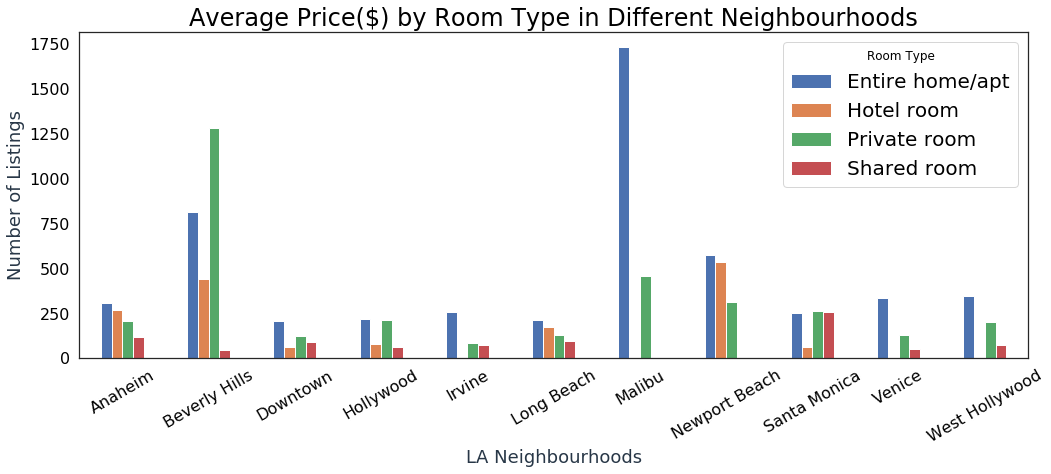

In [60]:
price_by_neighborhood_room = dff.pivot_table(index = 'neighbourhood',
                                                    columns = 'room_type',
                                                    values = 'price',
                                                    aggfunc = 'mean').round(2)
price_by_neighborhood_room

#Creating a Plot
price_by_neighborhood_room.plot(kind = 'bar',
                                title = 'Average Price($) by Room Type in Different Neighbourhoods',
                                figsize = (17,6))
#Rotating the xticks
plt.xticks(rotation = 30)
#X-label: LA
plt.xlabel('LA Neighbourhoods')
#Y-label: Number of Listings
plt.ylabel('Number of Listings')
#Legend Title
plt.legend(title = 'Room Type')
plt.show();

- The average prices for the Entire home is the highest especially in Malibu neighbourhood and almost all of the neighbourhoods are having high average price for the Entire Home/Apartment while Hotel room is completely missing in some of the neighbourhoods which means that room type is the least included out of all neighbourhoods in the city.

### How many Airbnb Listings have it's host's_identity_verified??

t    0.85815
f    0.14185
Name: host_identity_verified, dtype: float64

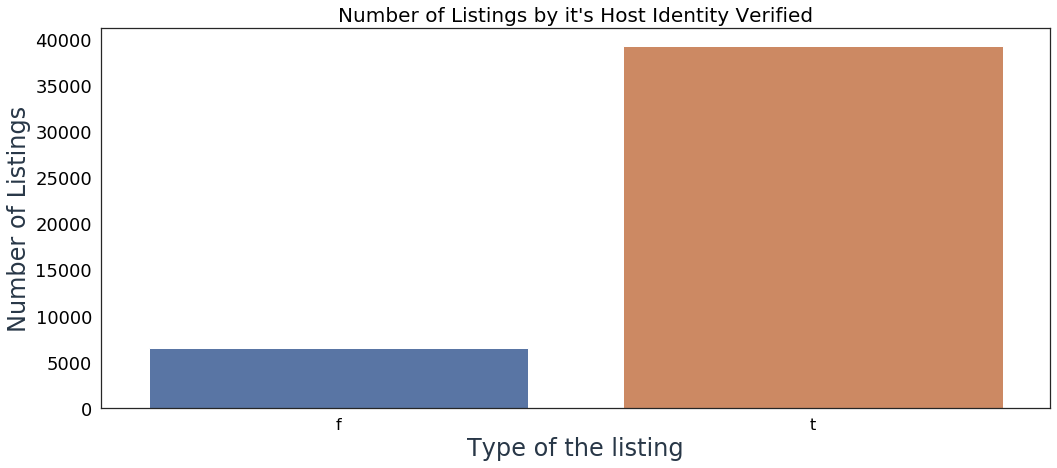

In [46]:
display(df['host_identity_verified'].value_counts(normalize = True))
room_plot = sns.countplot(df['host_identity_verified'])
room_plot.set(xlabel='', ylabel='Number of Airbnb')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 18)
plt.title("Number of Listings by it's Host Identity Verified", fontsize=20)
plt.xlabel('Type of the listing', fontsize=24)
plt.ylabel('Number of Listings', fontsize=24)
plt.show();


- If the traveller wants to consider you as a trustworthy hosts while booking an Airbnb is recommended that the hosts gets his identity verified

- 85% of the Listings have their Host identity verified (True), while 14% of the Airbnb hosts are yet to verify their listing in the Airbnb Website. These listings which do not have their host identity verified could also be potentially scam listings on the Airbnb Website.

# Trying to find how fast the Host Replies

within an hour        0.760606
within a few hours    0.149208
within a day          0.069988
a few days or more    0.020198
Name: host_response_time, dtype: float64

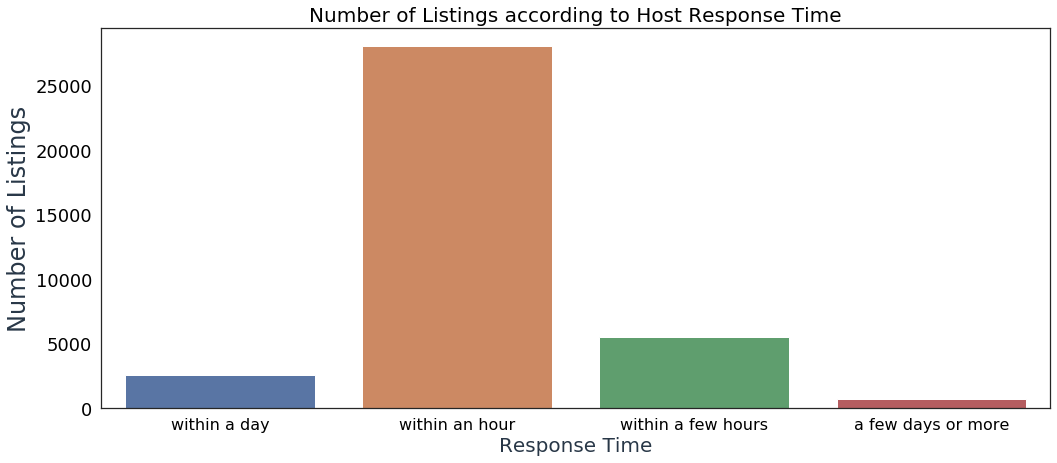

In [25]:
display(df['host_response_time'].value_counts(normalize = True))
room_plot = sns.countplot(df['host_response_time'])
room_plot.set(xlabel='', ylabel='Number of Airbnb')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 18)
plt.title("Number of Listings according to Host Response Time", fontsize=20)
plt.xlabel('Response Time', fontsize=20)
plt.ylabel('Number of Listings', fontsize=24)
plt.show();

Usually when travelers shortlist few Airbnb’s according to their requirements, preferred neighborhood and price. They do expect fast replies from the host for the booking. So when you host your listing on the Airbnb Website it is recommended to stay active and respond to the messages as quickly as possible as there are many number of listings listed on the website and if the traveller do not want to wait long, he can choose to go for another Airbnb in the similar neighbourhood and price range as the host has replied within an hour or within few hours and the wait time was much less. In this way, the host could lose a few number of guests that were planning to book his Airbnb. It is important to remember that there is tough competition in this business and staying active when you host a listing is essential in order to maximize the income.

- 76% of the Hosts responds within an hour.
- 14% of the Hosts responds within a few hours.
- 7% of the Hosts responds within a day.
- 2% of the Hosts responds within a few days or more.

# Checking the Host Acceptance Rate

100    0.577584
0      0.173917
90     0.081327
80     0.047364
70     0.031780
10     0.029226
50     0.020299
60     0.016108
40     0.010848
30     0.006810
20     0.004736
Name: host_acceptance_rate, dtype: float64

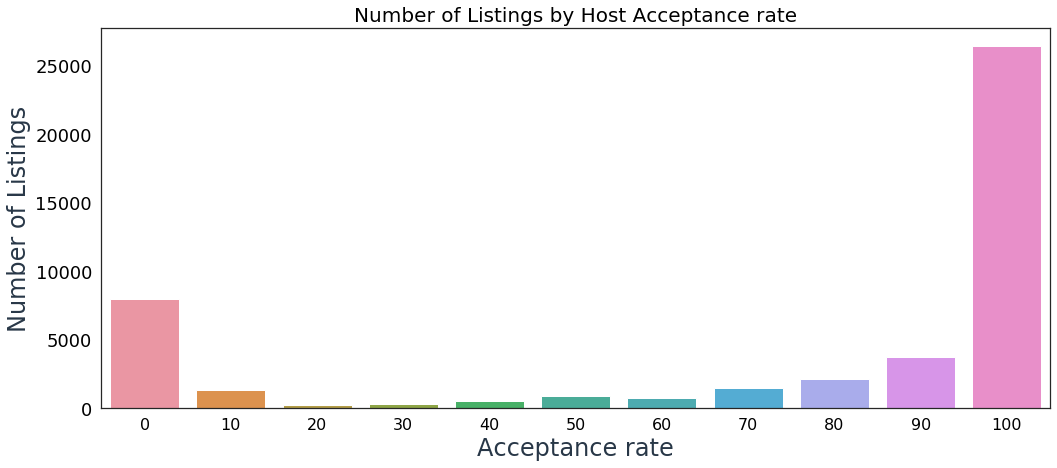

In [26]:
display(df['host_acceptance_rate'].value_counts(normalize = True))
room_plot = sns.countplot(df['host_acceptance_rate'])
room_plot.set(xlabel='', ylabel='Number of Airbnb')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 18)
plt.title("Number of Listings by Host Acceptance rate", fontsize=20)
plt.xlabel('Acceptance rate', fontsize=24)
plt.ylabel('Number of Listings', fontsize=24)
plt.show();

- 57% of the listings have a Host acceptance rate between 90% to 100%. 
- While 0.2% of the listings have a Host acceptance of less than 10%.
- Where 20% of the listings does not mention their Host Acceptance Rate. 

# Checking how many hosts have their identity verified through phone, email and work email

1    0.911164
0    0.088836
Name: host_email, dtype: float64

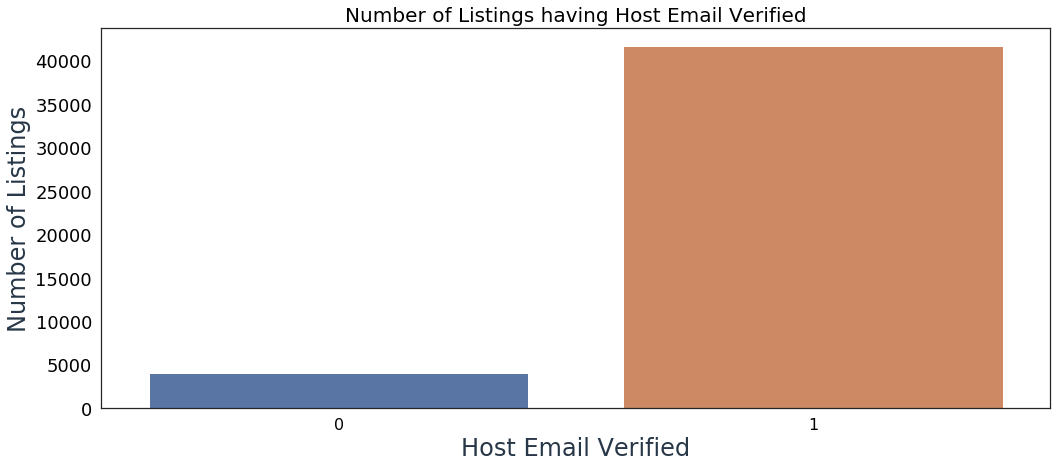

1    0.998407
0    0.001593
Name: host_phone, dtype: float64

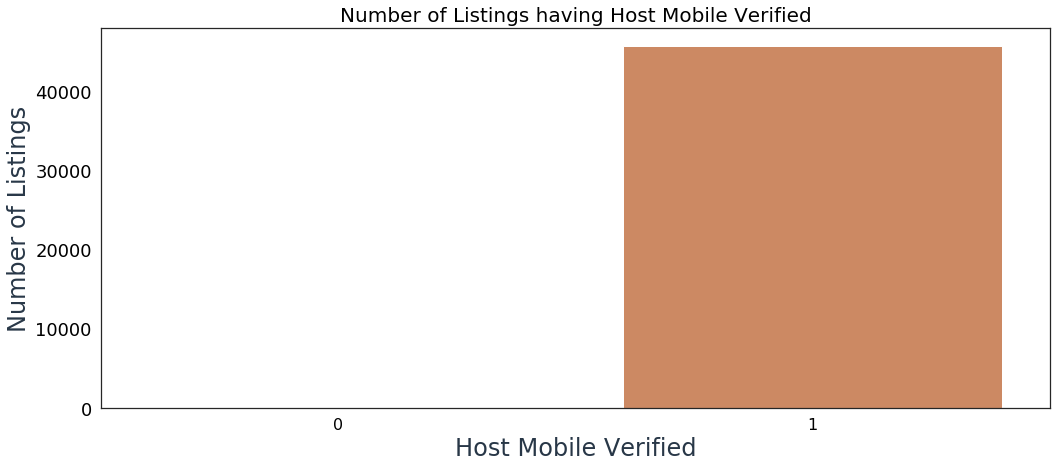

0    0.855855
1    0.144145
Name: host_work_email, dtype: float64

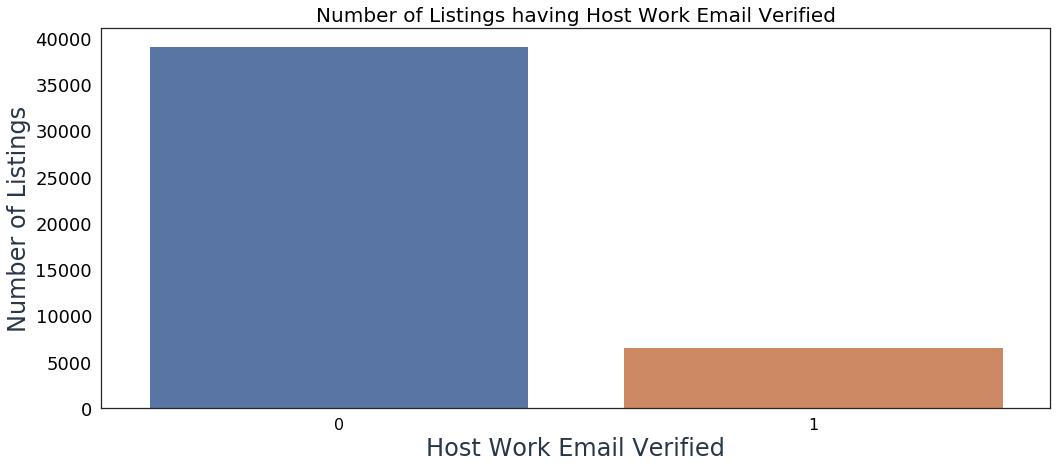

In [27]:
verifications = ['host_email', 'host_phone', 'host_work_email'];
labels = ['Host Email Verified', 'Host Mobile Verified', 'Host Work Email Verified']
i=0
for vrfn in verifications:
    display(df[vrfn].value_counts(normalize = True));
    room_plot = sns.countplot(df[vrfn]);
    room_plot.set(xlabel='', ylabel='Number of Listings');
    plt.xticks(fontsize = 16);
    plt.yticks(fontsize = 18);
    plt.title("Number of Listings having " + labels[i], fontsize=20);
    plt.xlabel(labels[i], fontsize=24);
    plt.ylabel('Number of Listings', fontsize=24);
    plt.show();
    i=i+1
plt.show();    

- If you as a traveler are planning to book an Airbnb, you should also consider if the host has his/her identity verified incase the listing has less number of reviews or if you believe that this listing could potentially be new listing on the Airbnb Website. This host verification is important factor as it can determine the genuinity of the host when he listed his property on the Website.

- 91 % of the Hosts have their listings verified through email.
- 99 % of the Hosts have their listings verified through Mobile
- 14 % of the host have their listings verified through their work email.

# Checking how the price is varying for the neighbourhoods

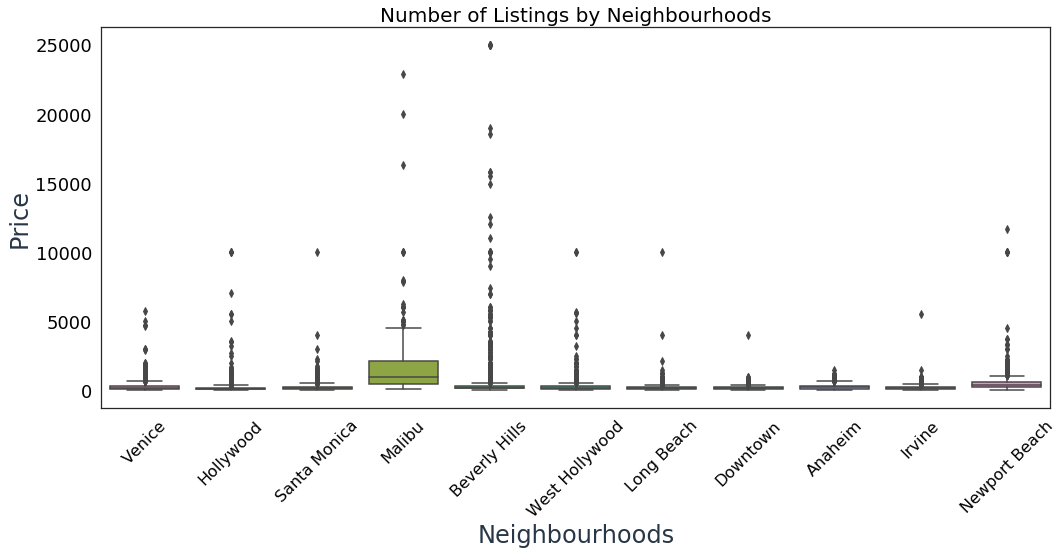

In [62]:
topn = 10
a = df['neighbourhood'].value_counts().sort_values(ascending = False).nlargest(topn+1).index.tolist()
dff = df[df['neighbourhood'].isin(['Hollywood',
 'Venice', 'Malibu',
 'Long Beach',
 'Newport Beach',
 'Santa Monica',
 'West Hollywood',
 'Anaheim',
 'Downtown',
 'Irvine',
 'Beverly Hills'])]

sns.boxplot(x='neighbourhood',y='price',data = dff)
plt.xticks(fontsize = 16, rotation = 45);
plt.yticks(fontsize = 18);
plt.title("Number of Listings by Neighbourhoods", fontsize=20);
plt.xlabel("Neighbourhoods", fontsize=24);
plt.ylabel('Price', fontsize=24);
    
plt.show();

- Malibu has the highest Average Price of the Properties followed by Beverly Hills, but one or more properties in Beverly Hills have even higher Price than any other listing.

# Distribution of reviews among available room types and neighborhood groups

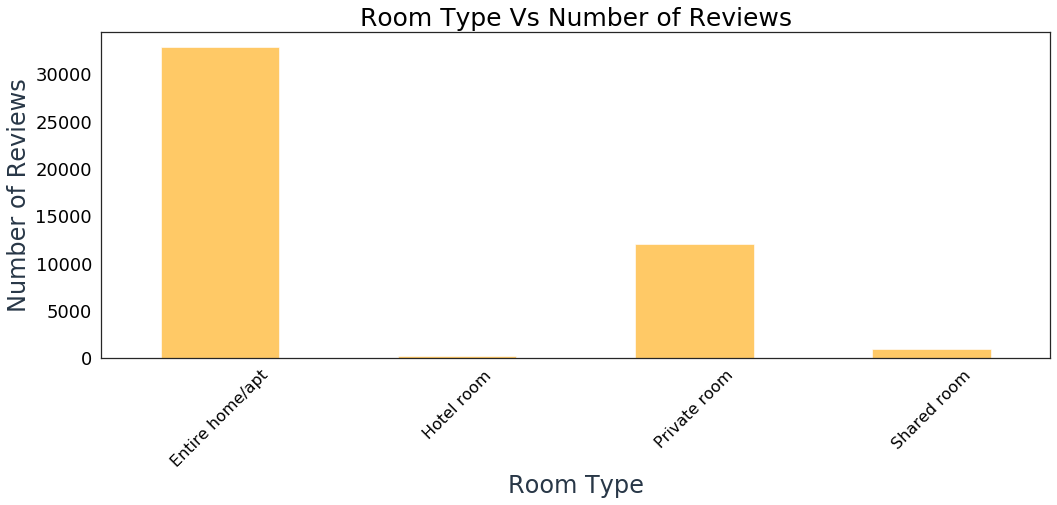

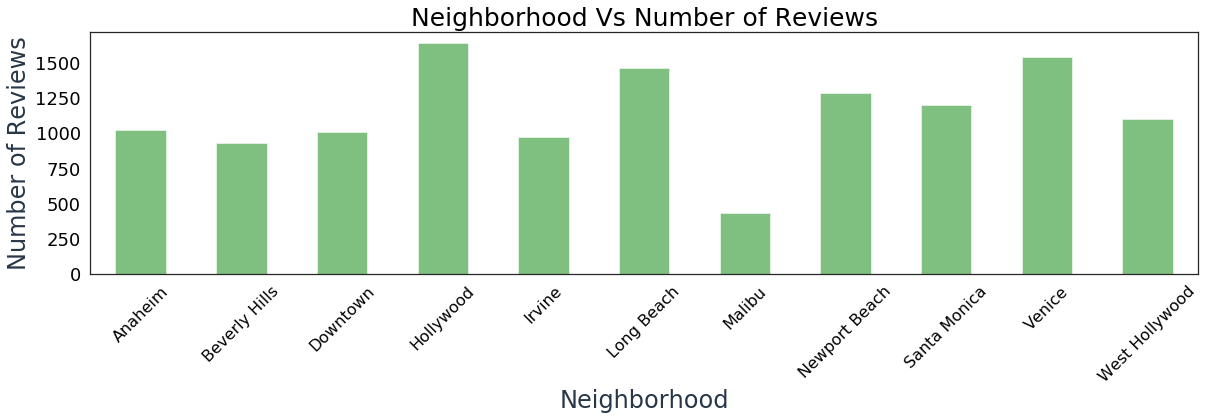

In [29]:
# Distribution of reviews among available room types and neighborhood groups

df.groupby(['room_type']).count()['number_of_reviews'].plot(kind='bar',alpha = 0.6,color = 'orange', figsize=(17, 6))
plt.title('Room Type Vs Number of Reviews',fontsize=25)
plt.xticks(fontsize = 16, rotation = 45);
plt.yticks(fontsize = 18);
plt.xlabel("Room Type", fontsize=24);
plt.ylabel('Number of Reviews', fontsize=24);
plt.show();

dff.groupby(['neighbourhood']).count()['number_of_reviews'].plot(kind='bar',color='green',alpha=0.5, figsize=(17, 6))
plt.title('Neighborhood Vs Number of Reviews',fontsize=25)
plt.xticks(fontsize = 16, rotation = 45);
plt.yticks(fontsize = 18);
plt.xlabel("Neighborhood", fontsize=24);
plt.ylabel('Number of Reviews', fontsize=24);

plt.tight_layout()
plt.show();

- Entire Home/Apartments and Private Rooms have more reviews then Hotel Rooms or Shared Rooms when considering the room type column.
- HollyWood, Long Beach and Venice Neighbourhoods have the highest number of reviews received.

# Which neighbourhood is the most expensive and cheapest to stay in? (Categorized according to average price)

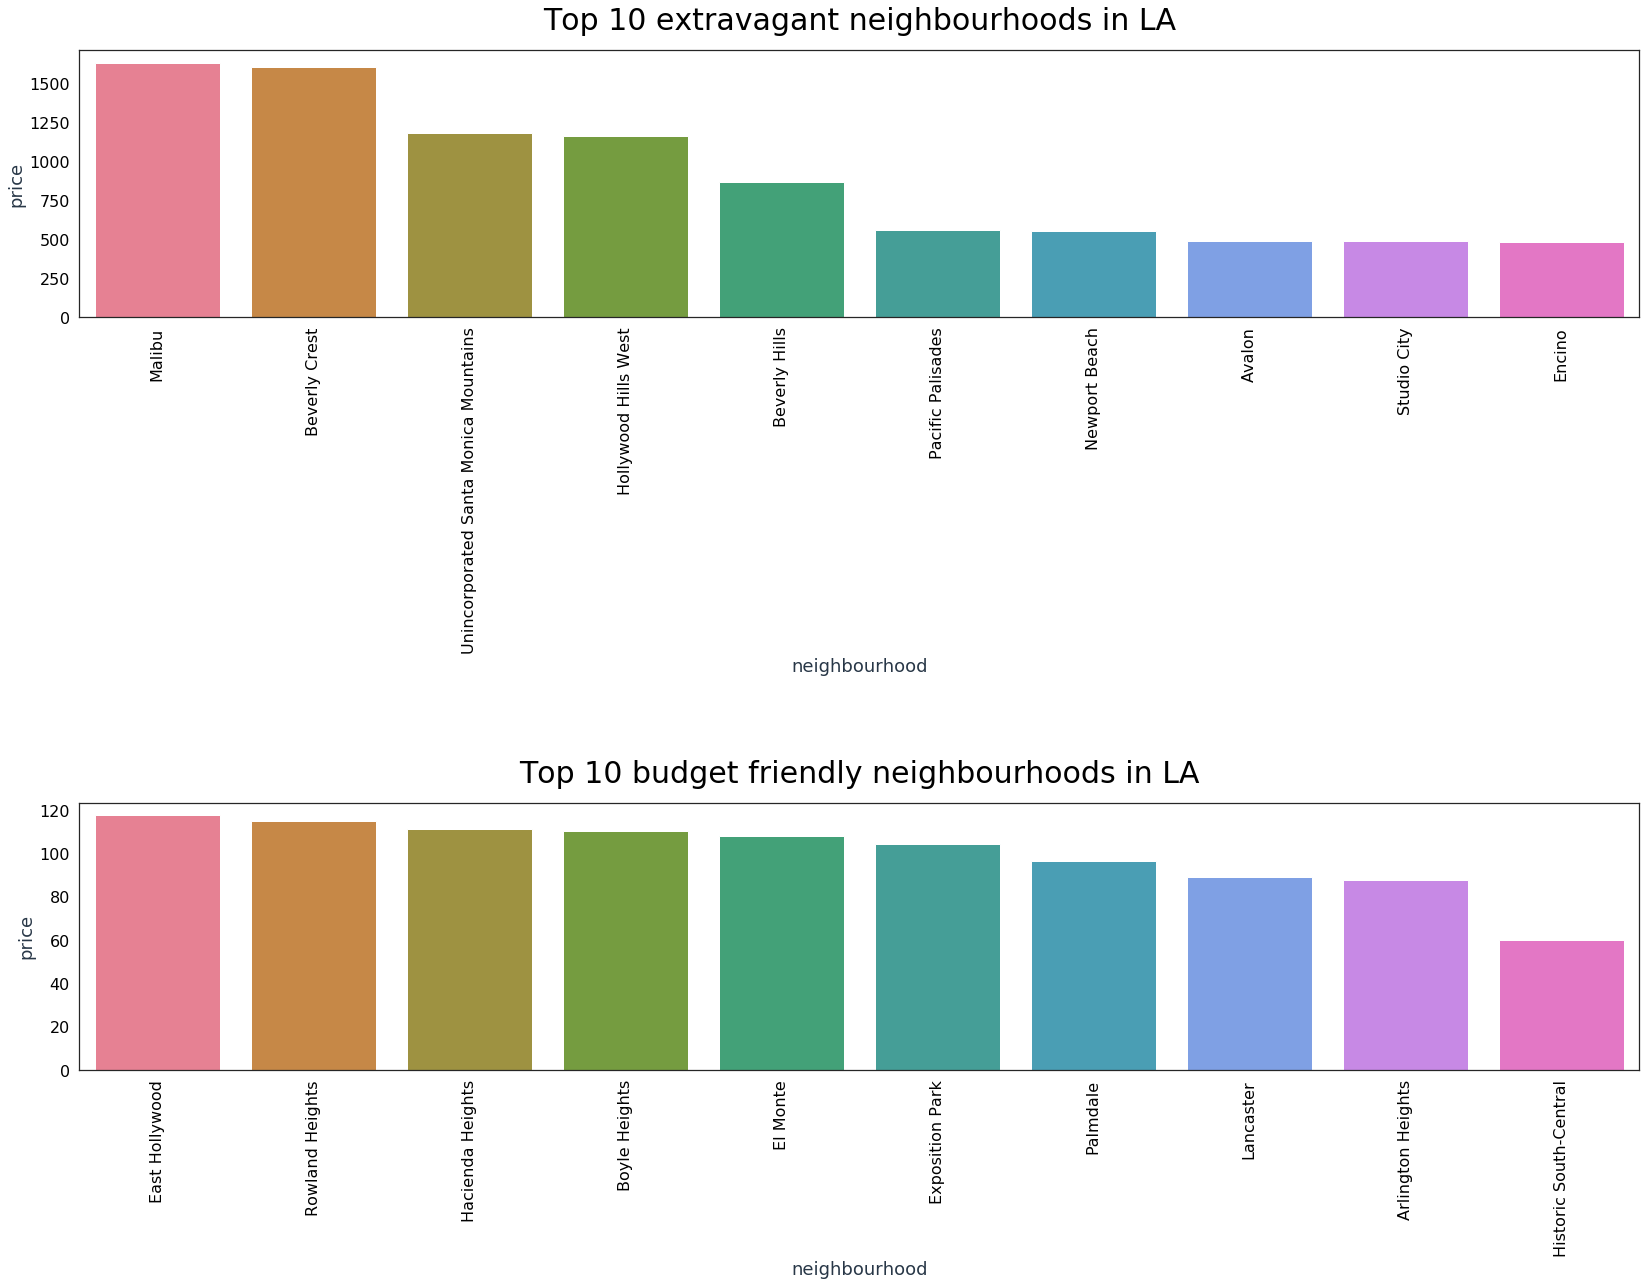

In [49]:
neigh_price_avg = df.groupby('neighbourhood').agg({'price': 'mean'}).sort_values('price',ascending=False).reset_index()
fig, ax = plt.subplots(2,1,figsize=(25,20))
neigh_price_max=sns.barplot(x=neigh_price_avg['neighbourhood'][0:10], y=neigh_price_avg['price'],palette='husl',ax=ax[0])
neigh_price_max.set_xticklabels(neigh_price_max.get_xticklabels(),rotation=90)
neigh_price_max.set_title("Top 10 extravagant neighbourhoods in LA",size=30,pad=20)
neigh_price_min=sns.barplot(x=neigh_price_avg['neighbourhood'][-10:], y=neigh_price_avg['price'],palette='husl',ax=ax[1])
neigh_price_min.set_xticklabels(neigh_price_min.get_xticklabels(),rotation=90)
neigh_price_min.set_title("Top 10 budget friendly neighbourhoods in LA",size=30,pad=20)
fig.tight_layout(pad=7.0)
plt.show()


- Features like location of the neighborhoods hugely impact the price of the listing. We have categorized these neighborhoods according to top 10 extravagant or top 10 budget friendly neighborhoods so that the travellers can choose to stay in the neighbourhoods according to their budget.There are a number of options to choose from if you want to experience a luxurious stay or on a budget during your travel.

- We have grouped these expensive and budget friendly neighbourhoods according to the average price.

- Malibu has the highest average Price range while Historic South Central has the lowest Price range.


# How many listings can be booked instantly?

Are you travelling to a place and would be staying there for quite a few weeks or more all of a sudden and have absoulety zero plans? Don’t worry, Airbnb can still help you out with your last minute travel plans! 
There is a filter called “Instantly Bookable”.   An Instantly Bookable listing means that the reservation is confirmed as soon as the guest confirms it, rather than waiting up to 24 hours for a host to approve it. Hosts do choose whether to enable Instantly Bookable filter or not on their listings.


In [33]:
df['instant_bookable'].value_counts(normalize = True)

f    0.620954
t    0.379046
Name: instant_bookable, dtype: float64

-  37% of the listings can be booked instantly within LA.

# Could the Property listings which are instantly bookable get more reviews?

In [37]:
# reviews group by bookability 
df.groupby('instant_bookable')['number_of_reviews'].mean()

instant_bookable
f    36.049457
t    33.806576
Name: number_of_reviews, dtype: float64

- Instant bookable attribute does not influence the number of reviews it gets

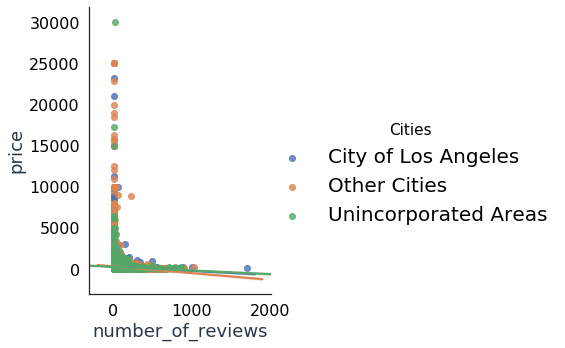

In [50]:
sns.lmplot(data=df, x="number_of_reviews", y="price", hue="Cities")

- We are trying to see if the number of reviews listed on the website impact the particular price of the listing. But the number of reviews might not play a major role in impacting the price for a listing.

# Distribution of neighbourhoods based on minimum nights

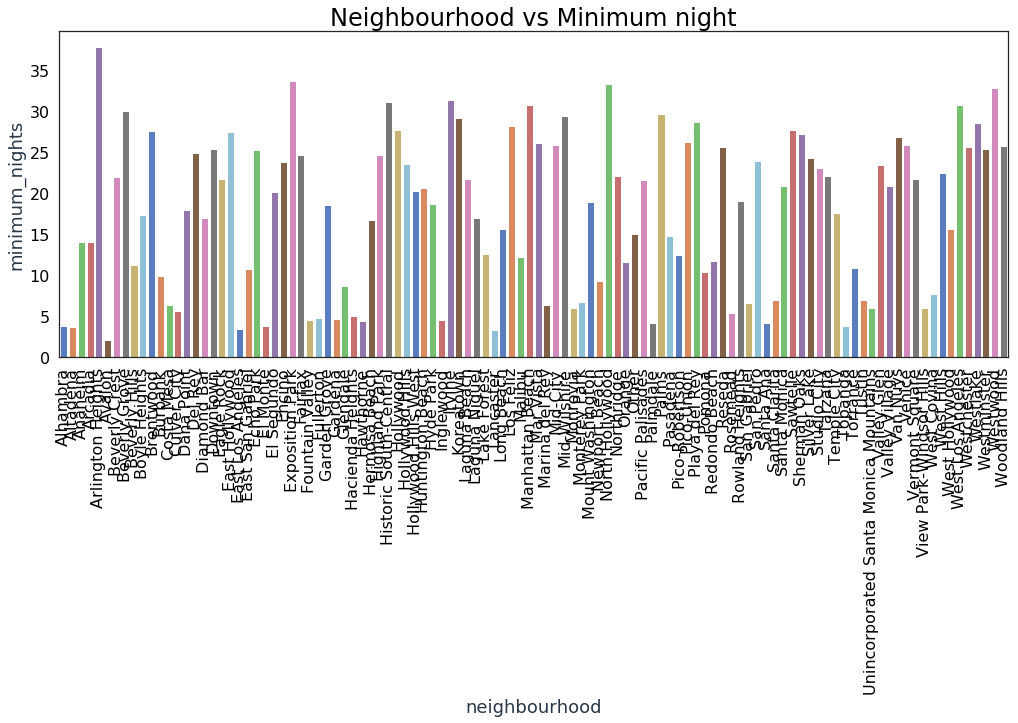

In [39]:
# Neighbourhoods where travellers have to spend a mandatory amount of nights
minimum_stay_df = df.groupby(('neighbourhood'), as_index=False)['minimum_nights'].mean() 

# Plot a barplot for the above visualization
fig = plt.figure(figsize=(17, 6))
sns.barplot(data= minimum_stay_df, x='neighbourhood', y='minimum_nights', palette="muted")
plt.xticks(rotation = 90)
plt.title('Neighbourhood vs Minimum night')
plt.show();

- Few hosts will mention that you have to spend a minimum of 7 nights or 12 nights of stay. So we are checking here the neighbourhoods and their minimum nights of stay.

1    0.925068
0    0.074932
Name: wifi, dtype: float64

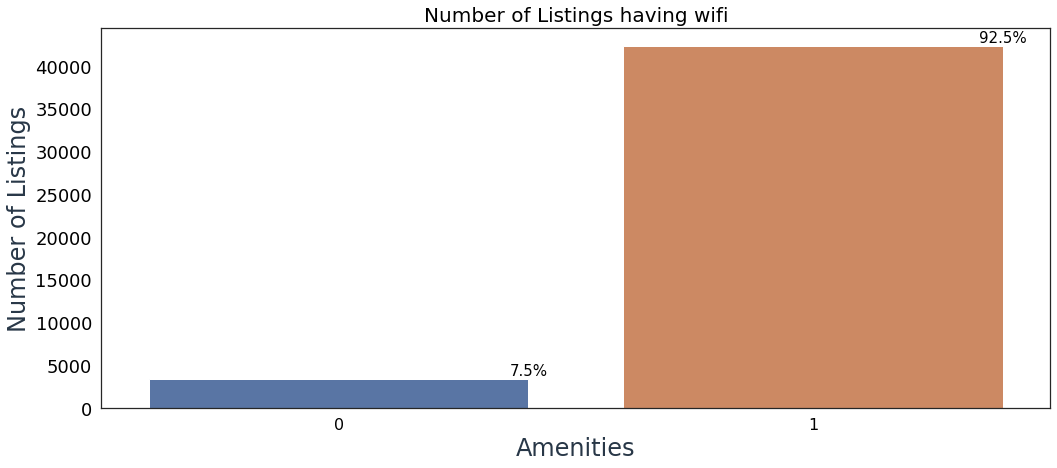

1    0.868034
0    0.131966
Name: kitchen, dtype: float64

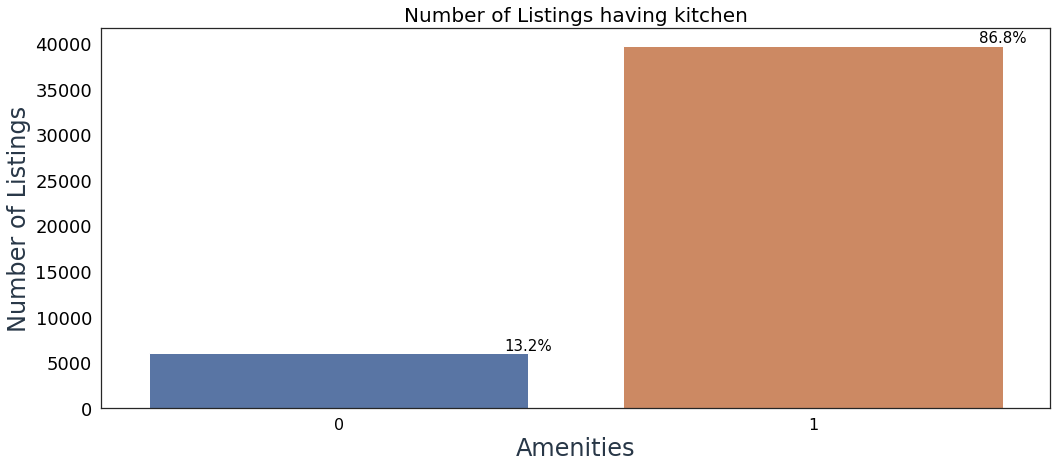

1    0.877355
0    0.122645
Name: parking, dtype: float64

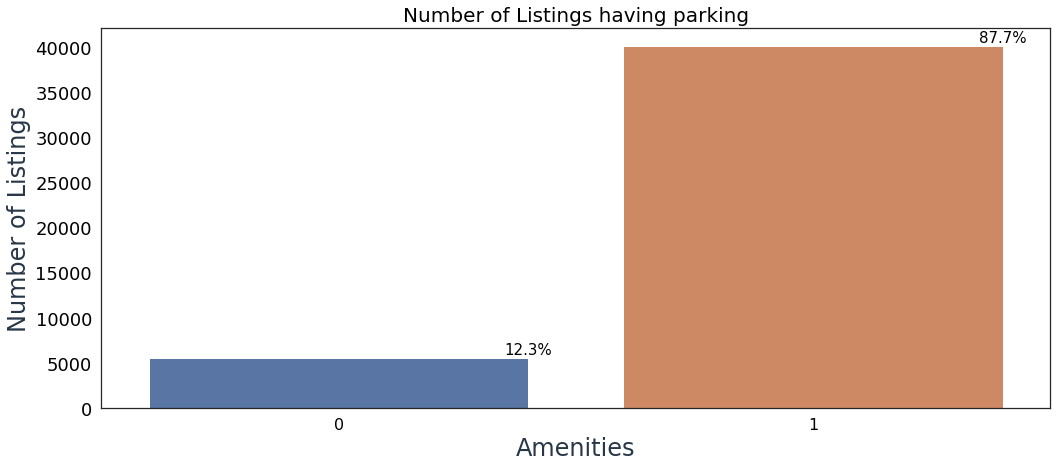

0    0.586598
1    0.413402
Name: bedding, dtype: float64

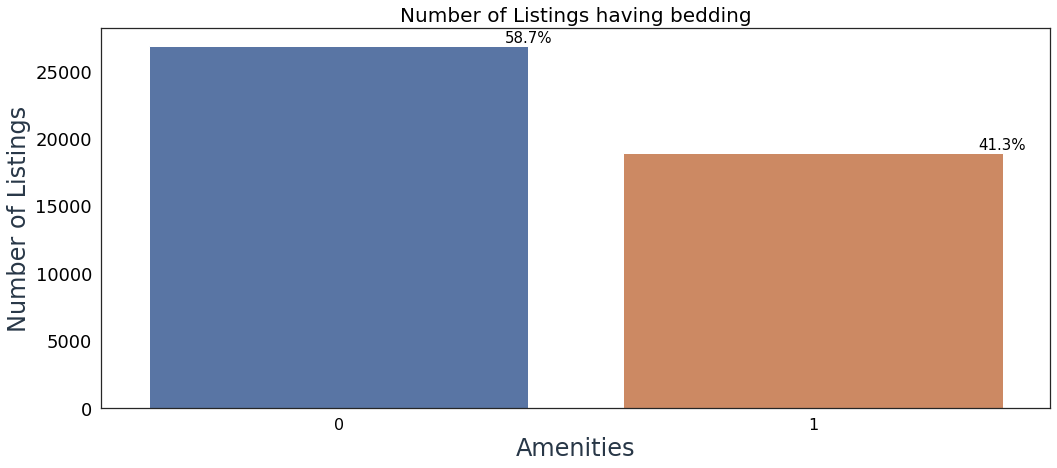

0    0.547877
1    0.452123
Name: bathessentials, dtype: float64

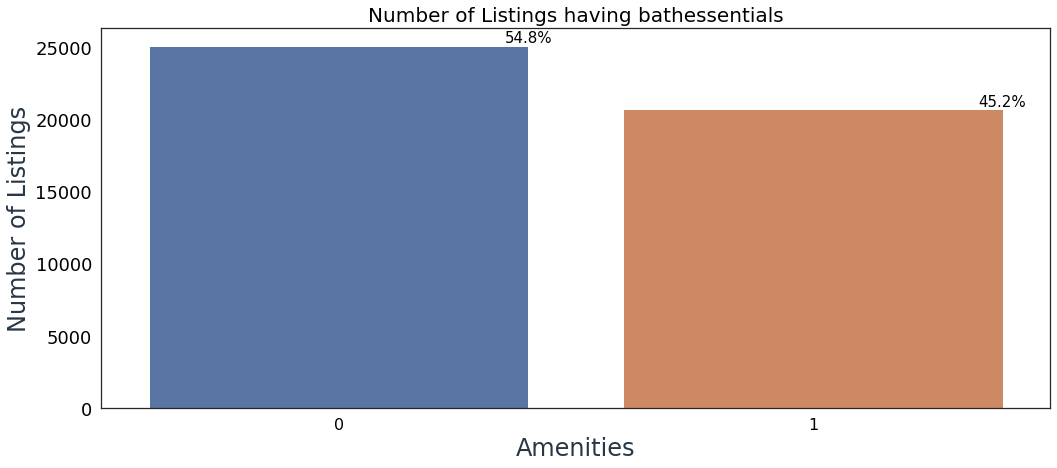

1    0.826672
0    0.173328
Name: ACHeating, dtype: float64

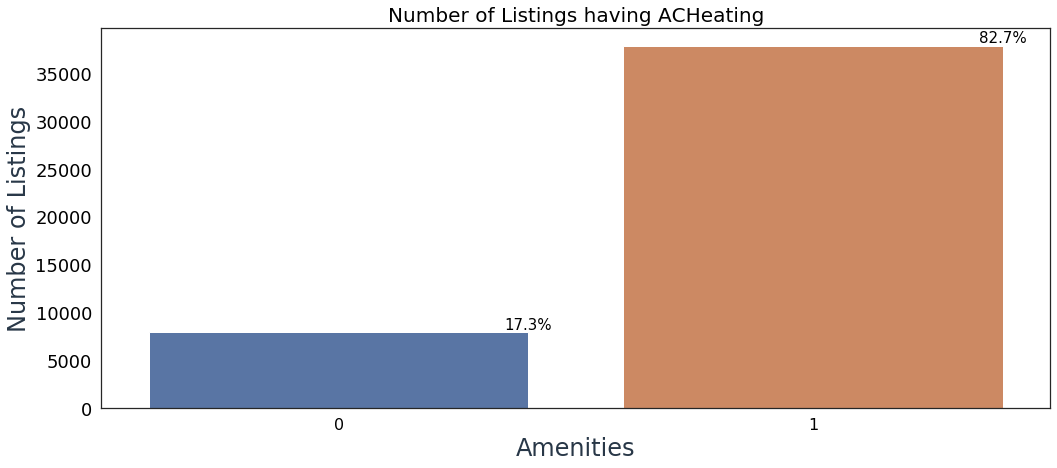

1    0.808862
0    0.191138
Name: washer, dtype: float64

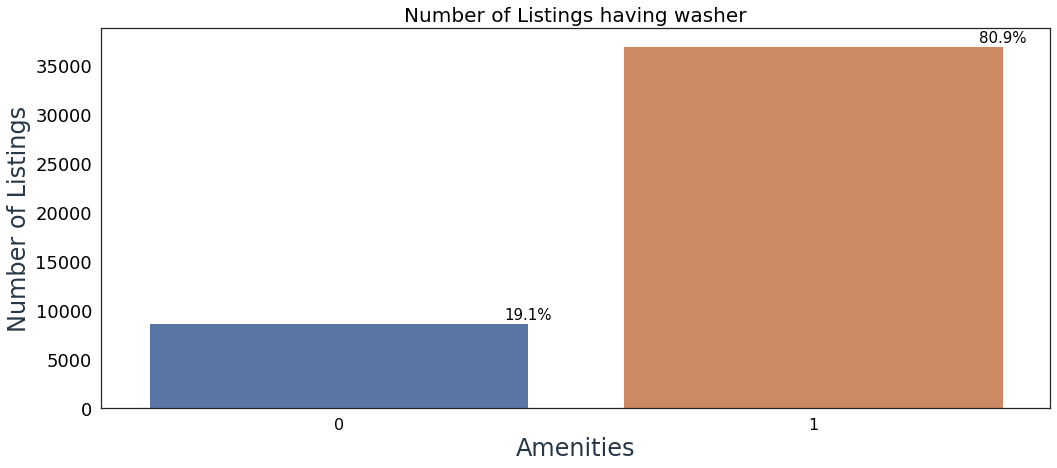

0    0.532249
1    0.467751
Name: workspace, dtype: float64

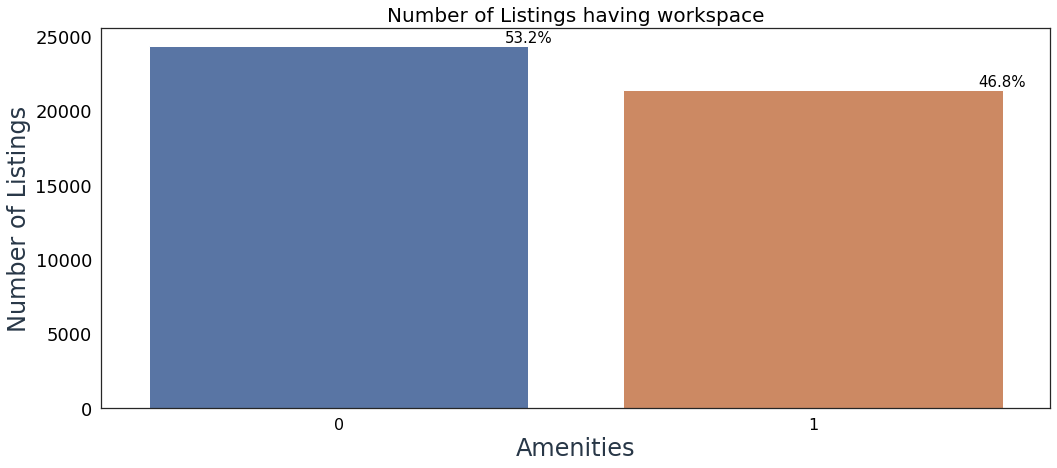

In [47]:
ameneties = ['wifi','kitchen','parking','bedding','bathessentials','ACHeating','washer','workspace'];
for amnty in ameneties:
    display(df[amnty].value_counts(normalize = True));
    room_plot = sns.countplot(df[amnty]);
    room_plot.set(xlabel='', ylabel='Number of Listings');
    plt.xticks(fontsize = 16);
    plt.yticks(fontsize = 18);
    plt.title("Number of Listings having " + amnty, fontsize=20);
    plt.xlabel('Amenities', fontsize=24);
    plt.ylabel('Number of Listings', fontsize=24);
    #plt.show();
    
    total = float(len(df[amnty]))
#     print(total)
    for p in room_plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        room_plot.annotate(percentage, (x, y),ha='center',va="bottom",fontsize=15)

    
    plt.show();
    
plt.show(); 

- 92.5% properties have WiFi/internet. The host can also check the speed of his Wifi in the Airbnb app and can make sure that their internet speed is 50 Mbps or more to get his listing highlighted to Fast Wifi in the amenities.
- 86.8% of the Properties have Kitchen Facility with the oven, stove, refrigerator.
- 87.7% of the Properties have Secured Parking Space.
- 41% of the Properties have Bedding essentials like extra pillows and comforters
- 45.2% of the Properties have Bath Essentials which includes a bathtub, soap, shampoo, toilet paper etc.
- 82.7% of the Properties have AC & Heating.
- 80.9% of the Properties have Washer & Dryer.
- 46.8% of the Properties have a Dedicated Workspace suitable for the travellers who would want to work remotely.


# Why could travelers be filtering for a Laptop-friendly workspace while booking an Airbnb and expecting hosts to include one in their listing?
- After the covid 19 lockdown people still prefer to work in a remote space environment/ Hybrid mode. So it will be a good idea to include the necessities required for their remote work to attract the more travelers towards your Airbnb listing and make them feel comfortable. This Laptop-friendly workspaces include nothing but a desk/table and a comfortable chair, along with having a Fast and reliable Wi-Fi/internet which is near to a power outlet or glass windows that could lighten up the whole room space.
- If these requirements are very necessary for travelers and they are looking for this as a definite must have in the listing that they are planning to book, your listing could be the one that they might opt for, if this amenity is included.
- Lastly make sure that you update this in your description, amenities, and take photos of this and post it along with your other Airbnb listing photos so that travelers can get a glimpse of it and can also find it through the filters by searching the keyword workspace.
- 46.8% of the Properties have a Dedicated Workspace that’s well-suited for working, for the travelers during their stay at the Airbnb. 
